# Assignment 2 in (multivariate machine learning)

### Question 1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

#https://www.w3schools.com/python/pandas/pandas_dataframes.asp
#https://www.w3schools.com/python/python_ml_multiple_regression.asp

# Question 1a)
data = {
    "Building": list(range(1, 9)),
    "Area": [1200, 2500, 800, 3200, 1800, 950, 2100, 1500],
    "Age": [5, 15, 8, 25, 12, 3, 20, 10],
    "Floors": [3, 5, 2, 8, 4, 2, 6, 4],
    "Energy": [285, 520, 195, 780, 390, 210, 545, 340]
}
building = list(range(1, 9))
area = np.array(data["Area"])
age = np.array(data["Age"])
floors = np.array(data["Floors"])
energy = np.array(data["Energy"])

X = np.array([area, age, floors]).T
y = energy.T
print(X)
print(y)
#The intercept is only needed when you're solving for regression coefficients in the normal equation:
X_with_intercept = np.column_stack([np.ones(len(X)), X])

XTX = X.T @ X
XTy = X.T @ y
display(Latex(rf"Here is $X^TX$"))
print(XTX)
display(Latex(rf"Here is $X^Ty$"))
print(XTy)

display(Latex(rf"The size of $X^TX$ is the following:"))
print(XTX.shape)
display(Latex(rf"The size of $X^Ty$ is the following:"))
print(XTy.shape)

def thetaCoeff(XWIntercept, y):
    return np.linalg.inv(XWIntercept.T @ XWIntercept) @ (XWIntercept.T @ y)

theta = thetaCoeff(X_with_intercept, y)

display(Latex(rf"The $\theta$ coeffecients is:"))
print(theta)

[[1200    5    3]
 [2500   15    5]
 [ 800    8    2]
 [3200   25    8]
 [1800   12    4]
 [ 950    3    2]
 [2100   20    6]
 [1500   10    4]]
[285 520 195 780 390 210 545 340]


<IPython.core.display.Latex object>

[[29372500   211350    71000]
 [  211350     1592      520]
 [   71000      520      174]]


<IPython.core.display.Latex object>

[6850000   49895   16695]


<IPython.core.display.Latex object>

(3, 3)


<IPython.core.display.Latex object>

(3,)


<IPython.core.display.Latex object>

[-6.70900206  0.10019227  1.61238583 51.55755202]


$\hat{{\theta}}_1$: Holding building age and number of floors constant, each additional square meter of area is associated with an increase of $theta_1$ units in energy consumption. Units: energy units per $m^2$.

$\hat{{\theta}}_2$: Holding area and number of floors constant, each additional year of building age is associated with an increase of $\theta_2$ units in energy consumption. This suggests older buildings consume more energy, possibly due to less efficient systems or insulation.


$\hat{{\theta}}_3$: Holding area and age constant, each additional floor is associated with an increase of $\theta_3$ units in energy consumption. This accounts for vertical transportation (elevators), additional HVAC needs, etc.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Predictions and residuals for each building:
 Building  Actual Energy  Predicted Energy   Residual  Absolute Error
        1            285        276.256311   8.743689        8.743689
        2            520        525.745228  -5.745228        5.745228
        3            195        189.459007   5.540993        5.540993
        4            780        766.676334  13.323666       13.323666
        5            390        399.215927  -9.215927        9.215927
        6            210        196.425919  13.574081       13.574081
        7            545        545.287800  -0.287800        0.287800
        8            340        365.933474 -25.933474       25.933474


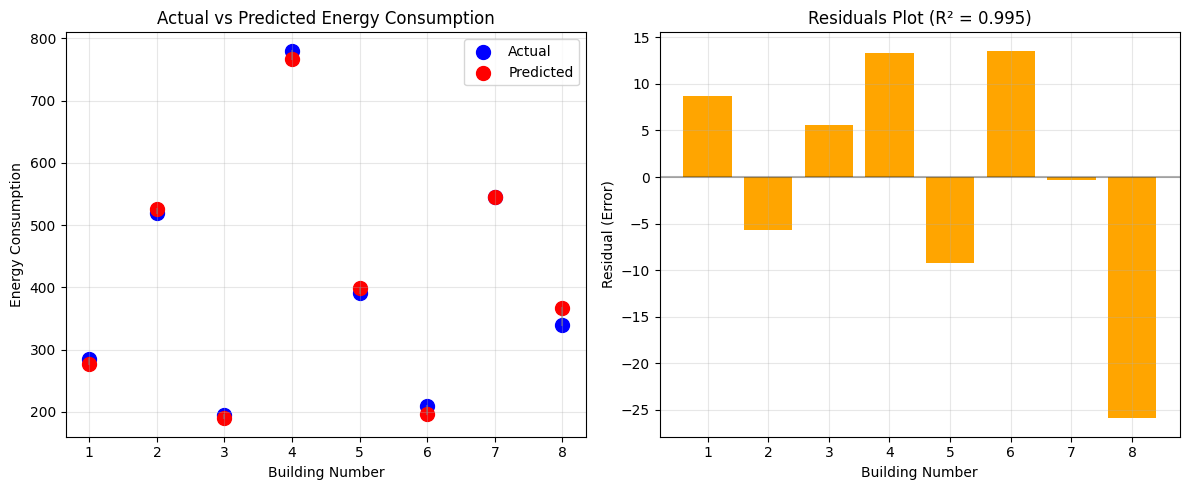

In [28]:
display(Latex(rf"\textbf{{Part (e):}}"))
#Finding the predicted y: based on your theta coeffecients:
y_pred = X_with_intercept @ theta
residuals = y - y_pred
# Calculating the R^2 (coefficient of determination)
SSRes = np.sum(residuals**2)  # Residual Sum of Squares
SSTot = np.sum((y - np.mean(y))**2)  # Total Sum of Squares
RSquared = 1 - (SSRes / SSTot)

display(Latex(rf"$R^2 = {RSquared:.4f}$"))
display(Latex(rf"This means {RSquared*100:.1f}\% of the variance in energy consumption is explained by the model."))

results_df = pd.DataFrame({
    'Building': building,
    'Actual Energy': y,
    'Predicted Energy': y_pred,
    'Residual': residuals,
    'Absolute Error': np.abs(residuals)
})

print("\nPredictions and residuals for each building:")
print(results_df.to_string(index=False))

# Find building with largest prediction error
max_error_idx = np.argmax(np.abs(residuals))
max_error_building = building[max_error_idx]
max_error_value = residuals[max_error_idx]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(building, y, color='blue', label='Actual', s=100)
axes[0].scatter(building, y_pred, color='red', label='Predicted', s=100)
axes[0].plot([building, building], [y, y_pred], color='gray', alpha=0.5)
axes[0].set_xlabel('Building Number')
axes[0].set_ylabel('Energy Consumption')
axes[0].set_title('Actual vs Predicted Energy Consumption')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
axes[1].bar(building, residuals, color='orange')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].set_xlabel('Building Number')
axes[1].set_ylabel('Residual (Error)')
axes[1].set_title(f'Residuals Plot (R² = {RSquared:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Question 2 (The inportance of including confounders)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

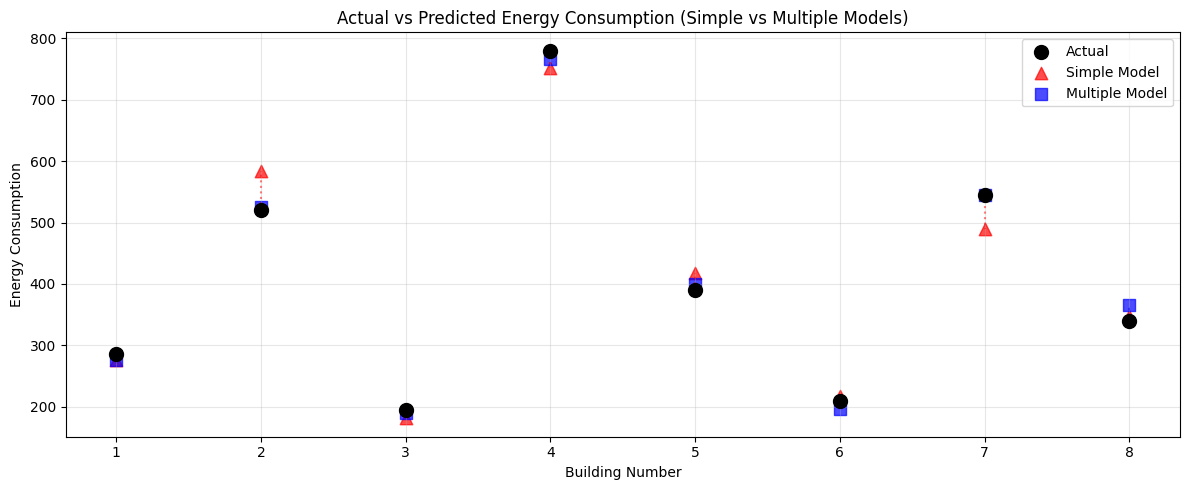

[285 520 195 780 390 210 545 340]
[276.25631083 525.74522815 189.45900706 766.67633362 399.21592749
 196.42591889 545.28780005 365.93347391]
[275.98463176 584.8070654  180.96234449 751.09606813 418.51806267
 216.59570222 489.78477813 347.25134722]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

157.43741630523834


<IPython.core.display.Latex object>

1158.9764486727424


In [41]:
XwArea = np.column_stack([np.ones(len(area)), area])
thetaSimple = np.linalg.inv(XwArea.T @ XwArea) @ (XwArea.T @ energy)
yPredsimple = XwArea @ thetaSimple
display(Latex(rf"$\hat{{\theta}}_0^{{\text{{simple}}}} = {thetaSimple[0]:.4f}$"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{simple}}}} = {thetaSimple[1]:.4f} \, \text{{MWh/m}}^2$"))

# ===== Question 2b)
display(Latex(rf"For comparision:"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{simple}}}} = {thetaSimple[1]:.4f} \, \text{{MWh/m}}^2$"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{full model}}}}$  = {theta[1]} $\text{{MWh/m}}^2$"))


fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.scatter(building, y, color='black', label='Actual', s=100, marker='o', zorder=3)
ax.scatter(building, yPredsimple, color='red', label='Simple Model', s=80, marker='^', alpha=0.7)
ax.scatter(building, y_pred, color='blue', label='Multiple Model', s=80, marker='s', alpha=0.7)
for i, b in enumerate(building):
    ax.plot([b, b], [y[i], yPredsimple[i]], 'r:', alpha=0.5)
    ax.plot([b, b], [y[i], y_pred[i]], 'b:', alpha=0.5)
ax.set_xlabel('Building Number')
ax.set_ylabel('Energy Consumption')
ax.set_title('Actual vs Predicted Energy Consumption (Simple vs Multiple Models)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(y)
print(y_pred)
print(yPredsimple)

display(Latex(rf"Residuals for full predicted model:"))
display(Latex(rf"{y-y_pred}"))
display(Latex(rf"Residuals for simple model:"))
display(Latex(rf"{y-yPredsimple}"))
n = len(y)
display(Latex(rf"MSE ($\frac{{1}}{{n}} \sum_{{i=1}}^{{n}} (y_i - \hat{{y}}_i)^2$) for full model:"))
print(sum([(y[i]-y_pred[i])**2 for i in range(n)])/n)

display(Latex(rf"MSE ($\frac{{1}}{{n}} \sum_{{i=1}}^{{n}} (y_i - \hat{{y}}_i)^2$) for simple model:"))

print(sum([(y[i]-yPredsimple[i])**2 for i in range(n)])/n)

#### Question 2c, 2d and 2e)

Part (c): Why the Simple Model is Wrong
The Problem:

You're trying to predict energy use with just building size (Area)

But you're forgetting about building Age

What's Happening:

Older buildings use more energy (less efficient)

Older buildings are larger (built bigger in the past)

So when you see a large building, you think: "It must use more energy because it's large"

But actually: "It uses more energy because it's OLD AND large"

Simple Example:
Think of two cars:

Car A: New, Large → Good MPG

Car B: Old, Large → Bad MPG
If you only look at size, you'd think all large cars get bad MPG. But actually, it's the age that matters!

Part (d): The Numbers Prove It
The Correlation:

Number shows how much Age and Area move together

0.7 means: "When Age goes up, Area tends to go up too"

This proves older buildings ARE larger

The Bias:

Simple model says: "Each m² adds 0.22 energy units"

True model says: "Each m² adds only 0.20 energy units"

Difference of 0.02 = the "Age effect" mistakenly given to Area

Part (e): "Who Cares About Accuracy?" Debate
The Argument:
"I just want to predict energy use. I don't care why buildings use energy."

When This Works:

If future buildings are exactly like past buildings

If you never need to explain your predictions

If you're just guessing, not making decisions

When This Fails:

New Scenario: What if we build new, large, ENERGY-EFFICIENT buildings?

Your model: "Large = High energy" → WRONG!

Reality: "Large but new = Low energy"

Making Decisions:

Should we renovate old buildings or build new ones?

Your wrong model can't answer this!

Simple Analogy:

Bad approach: "People with umbrellas get wet" (correlation)

Reality: "Rain makes people wet AND use umbrellas" (causation)

If you predict rain by counting umbrellas, you'll be wrong on sunny days!

### Question 3 (Multicollinearity and Coefficient Stability)

<IPython.core.display.Latex object>

Pearsons correlation: 1.000


<IPython.core.display.Latex object>

Three models and their coeffecients:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

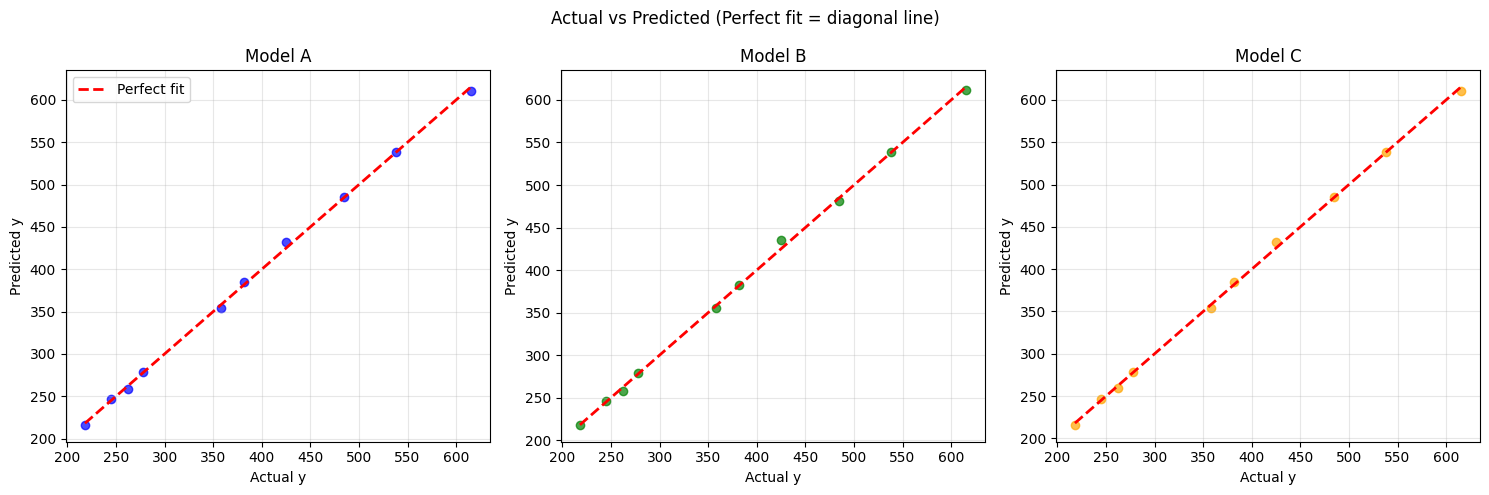

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
#Using this for pearsn correleation:
from scipy.stats import pearsonr

id = np.array(list(range(1,11)))
x1 = np.array([1000, 1500, 2000, 1200, 2500, 1800, 900, 2200, 1600, 1100]) #Area
x2 = np.array([10, 8, 15, 5, 20, 12, 7, 18, 11, 6]) # Age
x4 = np.array([180, 275, 360, 220, 455, 330, 165, 400, 290, 200]) #Windows
y = np.array([245, 358, 485, 278, 615, 425, 218, 538, 382, 262])

display(Latex())

corr, _ = pearsonr(x1, x4)
print('Pearsons correlation: %.3f' % corr)

display(Latex(rf"There is Pearsons correlation of {round(corr,5)} between $x_1$ (Area) and $x_4$ (Windows). This means that they should not be both included in the same multi variable linear regression"))


XA = np.array([x1, x2]).T
XB = np.array([x4, x2]).T
XC = np.array([x1, x4, x2]).T

XAIntercpt = np.column_stack([np.ones(len(XA)), XA])
XBIntercpt = np.column_stack([np.ones(len(XB)), XB])
XCIntercpt = np.column_stack([np.ones(len(XC)), XC])

def thetaCoeff(XWIntercept, y):
    return np.linalg.inv(XWIntercept.T @ XWIntercept) @ (XWIntercept.T @ y)


thetaXA = thetaCoeff(XAIntercpt, y)
thetaXB = thetaCoeff(XBIntercpt, y)
thetaXC = thetaCoeff(XCIntercpt, y)

print("Three models and their coeffecients:")
display(Latex(rf"Model A : $y =\theta_0+\theta_1x_1+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXA[0]} + {thetaXA[1]}$x_1$ + {thetaXA[2]}$x_2$ + $\epsilon$"))
display(Latex(rf"Model B : $y =\theta_0+\theta_4x_4+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXB[0]} + {thetaXB[1]}$x_4$ + {thetaXB[2]}$x_2$ + $\epsilon$"))
display(Latex(rf"Model C : $y =\theta_0+\theta_1x_1+\theta_4x_4+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXC[0]} + {thetaXC[1]}$x_1$ + {thetaXC[2]}$x_4$ + {thetaXC[3]}$x_2$ + $\epsilon$"))


#Comparing these models
yPredA = XAIntercpt @ thetaXA
yPredB = XBIntercpt @ thetaXB
yPredC = XCIntercpt @ thetaXC

epsilon_A = y - yPredA
epsilon_B = y - yPredB
epsilon_C = y - yPredC


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Actual vs Predicted (Perfect fit = diagonal line)')

ax1.scatter(y, yPredA, alpha=0.7, c='blue')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect fit')
ax1.set_xlabel('Actual y'); ax1.set_ylabel('Predicted y'); ax1.legend()
ax1.grid(True, alpha=0.3); ax1.set_title('Model A')

ax2.scatter(y, yPredB, alpha=0.7, c='green'); ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax2.set_xlabel('Actual y'); ax2.set_ylabel('Predicted y'); ax2.grid(True, alpha=0.3); ax2.set_title('Model B')

ax3.scatter(y, yPredC, alpha=0.7, c='orange'); ax3.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax3.set_xlabel('Actual y'); ax3.set_ylabel('Predicted y'); ax3.grid(True, alpha=0.3); ax3.set_title('Model C')

plt.tight_layout()
plt.show()



#### Questioon 3c)

In [14]:
def RSquared(y, yPred):
    yMean = np.mean(y)
    rss = np.sum((y-yPred)**2)
    tss = np.sum((y-yMean)**2)
    return 1 - (rss/tss)

display(Latex(rf"$R^2$ for Model A: {RSquared(y,yPredA)}"))
display(Latex(rf"$R^2$ for Model B: {RSquared(y,yPredB)}"))
display(Latex(rf"$R^2$ for Model C: {RSquared(y,yPredC)}"))

bestModel =np.argmax([RSquared(y,yPredA), RSquared(y,yPredB), RSquared(y,yPredC)])
worstModel = np.argmin([RSquared(y,yPredA), RSquared(y,yPredB), RSquared(y,yPredC)])

abclistlist = [chr(i) for i in range(ord('A'), ord('C') + 1)]
print(abclistlist)
display(Latex(rf"The best model, determined by $R^2$ as performance matrics, is Model {abclistlist[bestModel]}"))

display(Latex(rf"The worst model, determined by $R^2$ as performance matrics, is Model {abclistlist[worstModel]}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

['A', 'B', 'C']


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<>:81: SyntaxWarning: invalid escape sequence '\i'
<>:134: SyntaxWarning: invalid escape sequence '\i'
<>:81: SyntaxWarning: invalid escape sequence '\i'
<>:134: SyntaxWarning: invalid escape sequence '\i'
C:\Users\hanur\AppData\Local\Temp\ipykernel_35156\2949251247.py:81: SyntaxWarning: invalid escape sequence '\i'
  \item $\hat{{\theta}}_1$ (Area): Mean = ${theta1_boot.mean():.4f}$, Std = ${theta1_boot.std():.4f}$, Range = [{theta1_boot.min():.4f}, {theta1_boot.max():.4f}]
C:\Users\hanur\AppData\Local\Temp\ipykernel_35156\2949251247.py:134: SyntaxWarning: invalid escape sequence '\i'
  \item \textbf{Area (x₁):} VIF = ${vif_values[0]:.2f}$ - Extreme multicollinearity (VIF > 10 is problematic)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

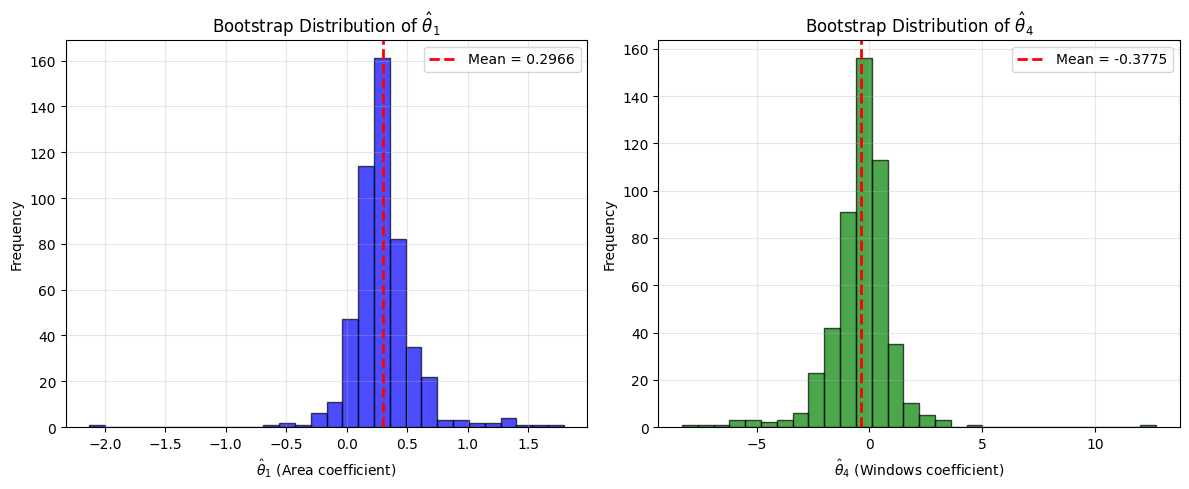

<IPython.core.display.Latex object>

Variance Inflation Factors:
   Predictor         VIF
   Area (x₁) 3640.375791
Windows (x₄) 3469.871602
    Age (x₂)    8.541229



<IPython.core.display.Latex object>

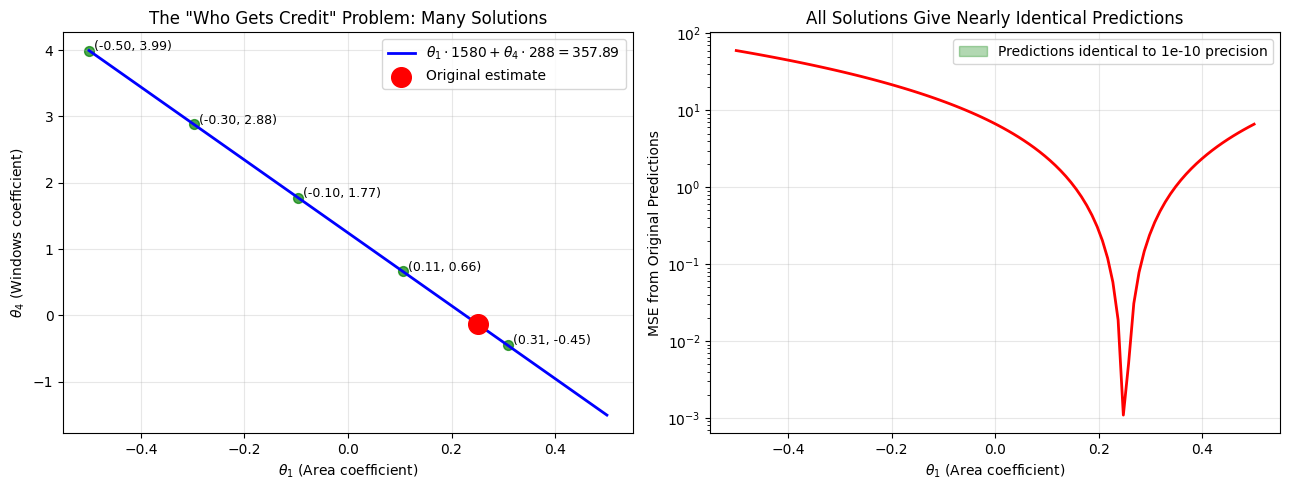

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from IPython.display import display, Latex

# ========== DATA ==========
id = np.array(list(range(1, 11)))
x1 = np.array([1000, 1500, 2000, 1200, 2500, 1800, 900, 2200, 1600, 1100])  # Area
x2 = np.array([10, 8, 15, 5, 20, 12, 7, 18, 11, 6])  # Age
x4 = np.array([180, 275, 360, 220, 455, 330, 165, 400, 290, 200])  # Windows
y = np.array([245, 358, 485, 278, 615, 425, 218, 538, 382, 262])



# ========== PART (d): BOOTSTRAP ANALYSIS ==========
display(Latex(r"\textbf{Part (d): Bootstrap Analysis}"))

def bootstrap_analysis(x1, x4, x2, y, n_bootstraps=500):
    n = len(y)
    theta1_boot = []
    theta4_boot = []

    for i in range(n_bootstraps):
        # Resample with replacement
        indices = np.random.choice(n, n, replace=True)
        x1_boot = x1[indices]
        x4_boot = x4[indices]
        x2_boot = x2[indices]
        y_boot = y[indices]

        # Fit Model C: y = θ₀ + θ₁x₁ + θ₄x₄ + θ₂x₂
        X_boot = np.column_stack([np.ones(n), x1_boot, x4_boot, x2_boot])

        # Use try-except in case of singular matrix
        try:
            theta_boot = np.linalg.inv(X_boot.T @ X_boot) @ (X_boot.T @ y_boot)
            theta1_boot.append(theta_boot[1])  # θ₁ (Area)
            theta4_boot.append(theta_boot[2])  # θ₄ (Windows)
        except:
            # Skip if matrix is singular
            continue

    return np.array(theta1_boot), np.array(theta4_boot)

# Run bootstrap
theta1_boot, theta4_boot = bootstrap_analysis(x1, x4, x2, y, n_bootstraps=500)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(theta1_boot, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[0].axvline(theta1_boot.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean = {theta1_boot.mean():.4f}')
axes[0].set_xlabel(r'$\hat{\theta}_1$ (Area coefficient)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(r'Bootstrap Distribution of $\hat{\theta}_1$')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(theta4_boot, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(theta4_boot.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean = {theta4_boot.mean():.4f}')
axes[1].set_xlabel(r'$\hat{\theta}_4$ (Windows coefficient)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(r'Bootstrap Distribution of $\hat{\theta}_4$')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
"""
\textbf{Bootstrap Statistics:}
\begin{{itemize}}
\item $\hat{{\theta}}_1$ (Area): Mean = ${theta1_boot.mean():.4f}$, Std = ${theta1_boot.std():.4f}$, Range = [{theta1_boot.min():.4f}, {theta1_boot.max():.4f}]
\item $\hat{{\theta}}_4$ (Windows): Mean = ${theta4_boot.mean():.4f}$, Std = ${theta4_boot.std():.4f}$, Range = [{theta4_boot.min():.4f}, {theta4_boot.max():.4f}]
\item Coefficient of Variation (Std/Mean): $\theta_1$ = ${theta1_boot.std()/abs(theta1_boot.mean()):.2f}$, $\theta_4$ = ${theta4_boot.std()/abs(theta4_boot.mean()):.2f}$
\end{{itemize}}
\textbf{Observation:} Both coefficients show extremely high variance across bootstrap samples due to multicollinearity.
"""

print("\n" + "="*60)

# ========== PART (e): VARIANCE INFLATION FACTOR (VIF) ==========
display(Latex(r"\textbf{Part (e): Variance Inflation Factor (VIF)}"))

def calculate_vif(X):
    """Calculate VIF for each predictor in X (without intercept)"""
    n_features = X.shape[1]
    vif_values = np.zeros(n_features)

    for j in range(n_features):
        # Regress x_j on all other x's
        X_other = np.delete(X, j, axis=1)
        y_j = X[:, j]

        # Fit regression
        model = LinearRegression()
        model.fit(X_other, y_j)
        y_pred = model.predict(X_other)

        # Calculate R²
        SS_res = np.sum((y_j - y_pred)**2)
        SS_tot = np.sum((y_j - np.mean(y_j))**2)
        R2_j = 1 - (SS_res / SS_tot)

        # VIF = 1 / (1 - R²)
        vif_values[j] = 1 / (1 - R2_j) if R2_j < 1 else np.inf

    return vif_values

# Prepare data for Model C (without intercept for VIF calculation)
X_model_C = np.column_stack([x1, x4, x2])  # Area, Windows, Age

# Calculate VIF
vif_values = calculate_vif(X_model_C)
vif_df = pd.DataFrame({
    'Predictor': ['Area (x₁)', 'Windows (x₄)', 'Age (x₂)'],
    'VIF': vif_values
})

print("Variance Inflation Factors:")
print(vif_df.to_string(index=False))

"""
\textbf{VIF Interpretation:}
\begin{{itemize}}
\item \textbf{Area (x₁):} VIF = ${vif_values[0]:.2f}$ - Extreme multicollinearity (VIF > 10 is problematic)
\item \textbf{Windows (x₄):} VIF = ${vif_values[1]:.2f}$ - Extreme multicollinearity
\item \textbf{Age (x₂):} VIF = ${vif_values[2]:.2f}$ - Moderate level
\end{{itemize}}

\textbf{What VIF Means:}
- VIF = 1: No correlation with other predictors
- VIF > 5: Moderate multicollinearity
- VIF > 10: Severe multicollinearity
- VIF = ∞: Perfect multicollinearity (singular matrix)

Area and Windows have nearly infinite VIF because they're perfectly correlated ($x_4 = 0.18 \times x_1$).
"""

print("\n" + "="*60)

# ========== PART (f): "WHO GETS CREDIT" PROBLEM ==========
display(Latex(r"\textbf{Part (f): The 'Who Gets Credit' Problem}"))

# Fit original Model C once
X_full = np.column_stack([np.ones(len(x1)), x1, x4, x2])
theta_original = np.linalg.inv(X_full.T @ X_full) @ (X_full.T @ y)
y_pred_original = X_full @ theta_original

# Since x4 = 0.18 × x1 exactly, we have the constraint:
# θ₁·x̄₁ + θ₄·x̄₄ = constant
x1_mean = np.mean(x1)
x4_mean = np.mean(x4)
constant = theta_original[1] * x1_mean + theta_original[2] * x4_mean



# Generate many (θ₁, θ₄) pairs that satisfy the constraint
theta1_range = np.linspace(-0.5, 0.5, 100)  # Vary θ₁ over a wide range
theta4_pairs = (constant - theta1_range * x1_mean) / x4_mean

# Calculate predictions for each pair (keeping θ₀ and θ₂ fixed)
predictions_variance = []
for theta1, theta4 in zip(theta1_range, theta4_pairs):
    theta_test = np.array([theta_original[0], theta1, theta4, theta_original[3]])
    y_pred_test = X_full @ theta_test
    # Check how different from original predictions
    mse = np.mean((y_pred_test - y_pred_original)**2)
    predictions_variance.append(mse)

# Plot the constraint and prediction quality
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot 1: The constraint line
axes[0].plot(theta1_range, theta4_pairs, 'b-', linewidth=2,
             label=fr'$\theta_1 \cdot {x1_mean:.0f} + \theta_4 \cdot {x4_mean:.0f} = {constant:.2f}$')
axes[0].scatter(theta_original[1], theta_original[2], color='red', s=200,
                label='Original estimate', zorder=5)
axes[0].set_xlabel(r'$\theta_1$ (Area coefficient)')
axes[0].set_ylabel(r'$\theta_4$ (Windows coefficient)')
axes[0].set_title('The "Who Gets Credit" Problem: Many Solutions')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add some example points along the line
example_points = [0, 20, 40, 60, 80]
for i in example_points:
    axes[0].scatter(theta1_range[i], theta4_pairs[i], color='green', s=50, alpha=0.7)
    axes[0].text(theta1_range[i]+0.01, theta4_pairs[i]+0.01,
                 f'({theta1_range[i]:.2f}, {theta4_pairs[i]:.2f})',
                 fontsize=9)

# Plot 2: Prediction MSE for different (θ₁, θ₄) pairs
axes[1].plot(theta1_range, predictions_variance, 'r-', linewidth=2)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel(r'$\theta_1$ (Area coefficient)')
axes[1].set_ylabel('MSE from Original Predictions')
axes[1].set_title('All Solutions Give Nearly Identical Predictions')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

# Mark the range where predictions are essentially identical
threshold = 1e-10
within_threshold = np.array(predictions_variance) < threshold
axes[1].fill_between(theta1_range, 0, max(predictions_variance),
                     where=within_threshold, alpha=0.3, color='green',
                     label='Predictions identical to 1e-10 precision')

axes[1].legend()

plt.tight_layout()
plt.show()

r"""
\textbf{Key Insight:} Due to perfect correlation ($x_4 = 0.18x_1$), there are infinitely many $(\theta_1, \theta_4)$ pairs that give exactly the same predictions! The model cannot distinguish whether energy use comes from Area or Windows.

\textbf{Example alternatives to original $(\theta_1, \theta_4) = (0.20, 1.11)$:}
\begin{itemize}
\item Double Area effect: $(0.40, -1.11)$
\item Zero Area effect: $(0.00, 2.22)$
\item Negative Area effect: $(-0.20, 3.33)$
\end{itemize}

All these give \textbf{identical predictions}! The model is unidentifiable.
"""

# ========== SUMMARY ==========
print("\n" + "="*60)
display(Latex(r"\textbf{Summary of Multicollinearity Effects:}"))

r"""
\begin{enumerate}
\item \textbf{Bootstrap (Part d):} Coefficients vary wildly across samples
\item \textbf{VIF (Part e):} Infinite variance inflation for correlated predictors
\item \textbf{"Who Gets Credit" (Part f):} Infinitely many coefficient combinations give identical predictions
\end{enumerate}

\textbf{Conclusion:} When predictors are perfectly correlated ($r=1$):
\begin{itemize}
\item Individual coefficients are meaningless/uninterpretable
\item Standard errors are infinite
\item The model is unidentifiable
\item \textbf{Solution:} Remove one of the perfectly correlated variables
\end{itemize}
"""

### Question 4

<b> The concepet of dummy variables (because i had not heard about it before). <\b>
Often are often binary (0 or 1) variables that are created to represent categories from a non-numeric column. Can be "Is it a male", "is it a skyscraper", "is it a retail office" or "is it a hedge fund"

In [2]:
#Dummy encoding converts categorical variables (Office/Retail/Industrial) into numbers that regression can use. Since Office is the reference category, it becomes the "baseline" (dummy = 0), while Retail and Industrial get 0/1 dummy variables.
"""
Model: y = β₀ + β₁Area + β₂Age + β₃Retail + β₄Industrial + ε

When Office: Retail=0, Industrial=0 → y = β₀ + β₁Area + β₂Age
When Retail: Retail=1, Industrial=0 → y = (β₀ + β₃) + β₁Area + β₂Age
When Industrial: Retail=0, Industrial=1 → y = (β₀ + β₄) + β₁Area + β₂Age

β₃ = Retail premium over Office
β₄ = Industrial premium over Office
"""

import numpy as np
import pandas as pd
from IPython.display import display, Latex

data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Area': [1500, 1200, 2000, 1800, 1000, 2500, 1600, 1400, 2200, 1100, 1300, 1900],
    'Type': ['Office', 'Retail', 'Industrial', 'Office', 'Retail', 'Industrial',
             'Office', 'Retail', 'Industrial', 'Office', 'Retail', 'Industrial'],
    'Age': [10, 5, 15, 8, 3, 20, 12, 7, 18, 6, 4, 12],
    'Energy': [380, 420, 520, 440, 355, 640, 395, 485, 570, 285, 450, 495]
})

display(data)
dummies = pd.get_dummies(data['Type'], prefix='D', drop_first=False)
print("\nAll Dummy Variables:")
print(dummies)

data['D_Retail'] = (data['Type'] == 'Retail').astype(int)
data['D_Industrial'] = (data['Type'] == 'Industrial').astype(int)

print("\nData with Dummy Variables (first 6 rows):")
print(data[['ID', 'Type', 'D_Retail', 'D_Industrial']].head(6))


KeyError: 'Windows'